Data Exploration

In [ ]:
import pandas as pd
df_wine = pd.read_csv('/content/winequality-white.csv', sep=';')
df_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
mean_values = df_wine.mean()
median_values = df_wine.median()
std_values = df_wine.std()
print("📌 Mean of each feature:\n", mean_values)
print("\n📌 Median of each feature:\n", median_values)
print("\n📌 Standard Deviation of each feature:\n", std_values)


📌 Mean of each feature:
 fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

📌 Median of each feature:
 fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

📌 Standard Deviation of each feature:
 fixed acidity            1.741096
volatile acidity         0.179060
citri

In [ ]:
print(df_wine.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
dtype: int64


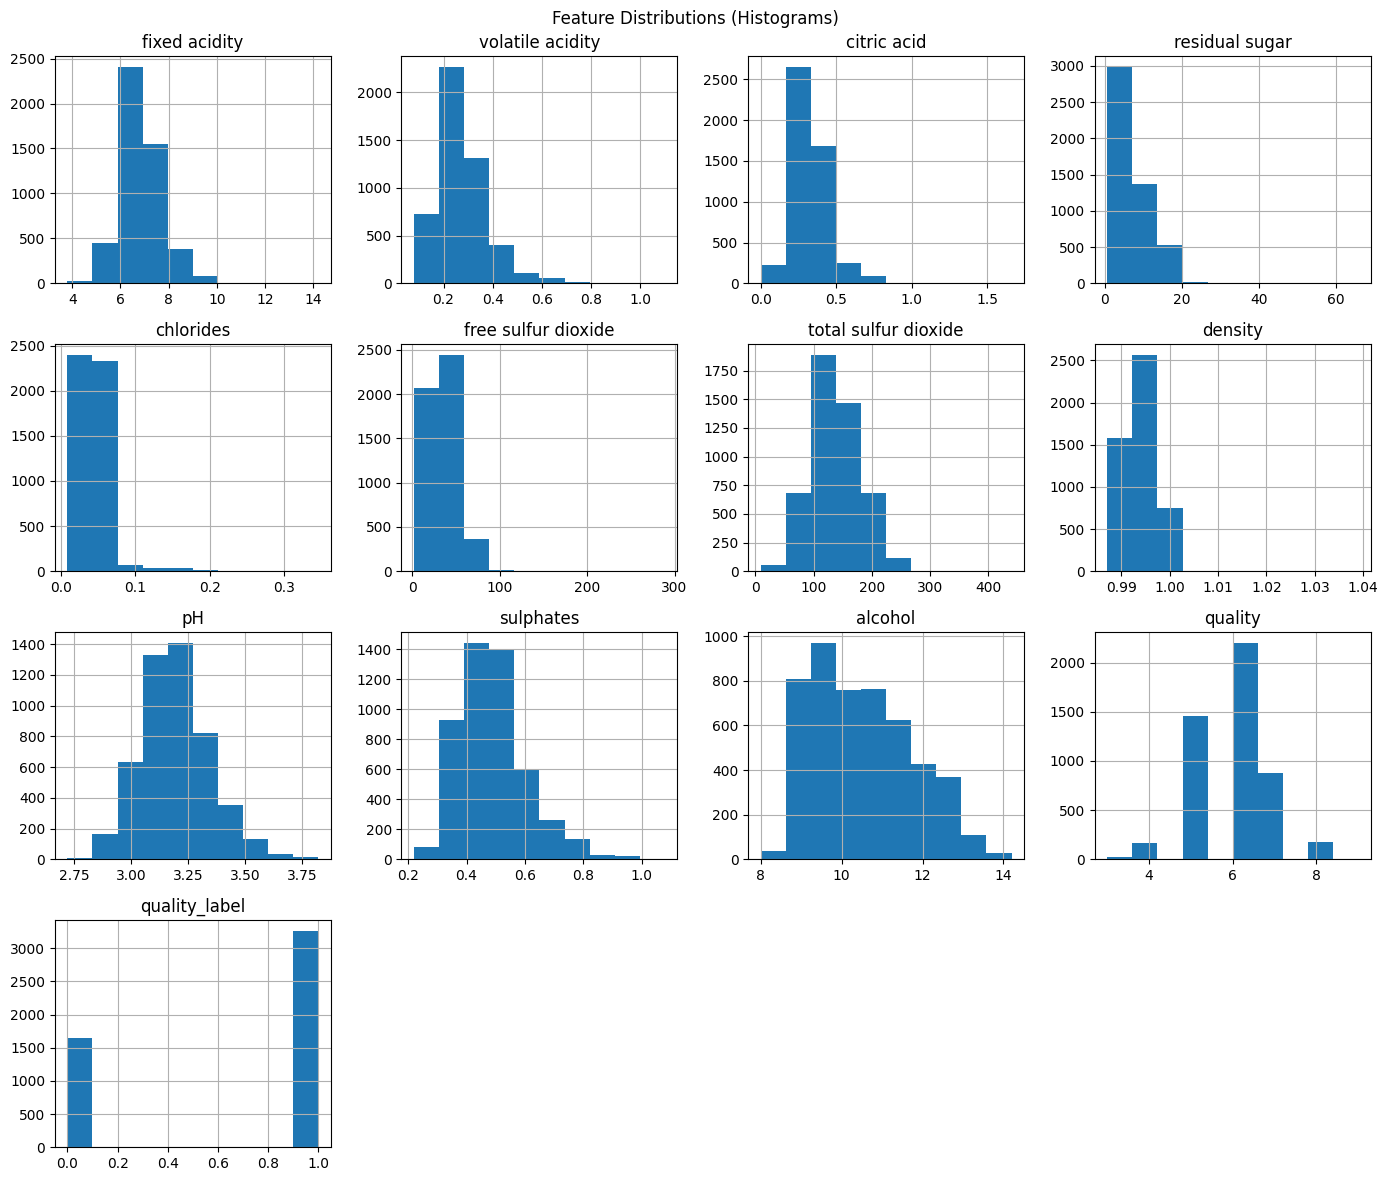

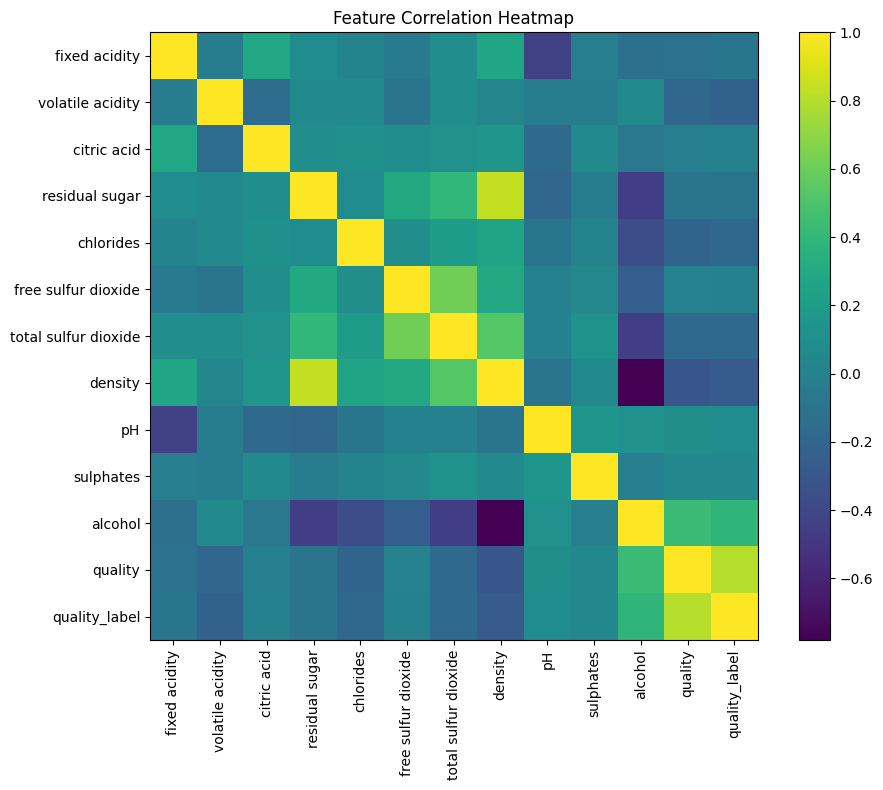

In [ ]:
import matplotlib.pyplot as plt
df_wine.hist(figsize=(14, 12))
plt.suptitle("Feature Distributions (Histograms)")
plt.tight_layout()
plt.show()
corr_matrix = df_wine.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()



Data preparation

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_wine_scaled = scaler.fit_transform(df_wine)

df_wine_scaled = pd.DataFrame(df_wine_scaled, columns=df_wine.columns)

df_wine_scaled.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder
import pandas as pd
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target
encoder = LabelEncoder()
df_wine['target_encoded'] = encoder.fit_transform(df_wine['target'])

df_wine[['target', 'target_encoded']].head()


,target,target_encoded
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df_wine.drop(['quality', 'quality_label'], axis=1)
y = df_wine['quality_label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (3918, 12)
Testing set size: (980, 12)


Model Implementation using Keras/Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
input_dim = X_train.shape[1]
num_classes = y_train_cat.shape[1]
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,355 (48.26 KB)

 Trainable params: 12,355 (48.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy'])



In [ ]:
history = model.fit(
    X_train,
    y_train_cat,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test_cat)
)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5567 - loss: 3.5301 - val_accuracy: 0.7980 - val_loss: 0.6828
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7772 - loss: 0.5642 - val_accuracy: 0.7704 - val_loss: 0.5246
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8490 - loss: 0.4576 - val_accuracy: 0.8245 - val_loss: 0.3736
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9228 - loss: 0.2978 - val_accuracy: 0.9143 - val_loss: 0.2384
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9588 - loss: 0.1956 - val_accuracy: 0.9796 - val_loss: 0.1247
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9726 - loss: 0.1191 - val_accuracy: 0.9878 - val_loss: 0.0760
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9890 - loss: 0.0706 - val_accuracy: 0.9908 - val_loss: 0.0536
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.0472 - val_accuracy: 0.9980 - val_lo

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy:", accuracy)

print(classification_report(y_true, y_pred_classes))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00       723

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



Hyperparameter Tunning

In [ ]:
!pip install scikeras
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "hidden_layer_sizes": [(32,), (64,), (64, 32)],
    "learning_rate_init": [0.001, 0.01],
    "batch_size": [64]
}

mlp = MLPClassifier(
    activation="relu",
    solver="adam",
    max_iter=200,
    random_state=42
)

grid = GridSearchCV(
    mlp,
    param_grid,
    cv=3,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

print("Best Accuracy:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

Best Accuracy: 1.0
Best Parameters: {'batch_size': 64, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.001}


In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    "hidden_layer_sizes": [(32,), (64,), (64, 32), (128, 64)],
    "learning_rate_init": [0.0005, 0.001, 0.01],
    "batch_size": [32, 64]
}
mlp = MLPClassifier(
    activation="relu",
    solver="adam",
    max_iter=200,
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    random_state=42
)
random_search.fit(X_train, y_train)
print("Best Accuracy (Random Search):", random_search.best_score_)
print("Best Parameters (Random Search):", random_search.best_params_)


Best Accuracy (Random Search): 1.0
Best Parameters (Random Search): {'learning_rate_init': 0.01, 'hidden_layer_sizes': (64, 32), 'batch_size': 32}


Performance Evaluation

In [ ]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Method": ["Grid Search", "Random Search"],
    "Best Accuracy": [
        grid.best_score_,
        random_search.best_score_
    ],
    "Best Parameters": [
        grid.best_params_,
        random_search.best_params_
    ]
})

comparison_df

,Method,Best Accuracy,Best Parameters
0,Grid Search,1.0,"{'batch_size': 64, 'hidden_layer_sizes': (32,)..."
1,Random Search,1.0,"{'learning_rate_init': 0.01, 'hidden_layer_siz..."


In [ ]:
import numpy as np

y_pred = np.argmax(model.predict(X_test), axis=1)

y_true = np.argmax(y_test_cat, axis=1)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_true, y_pred))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 1.0
Confusion Matrix:
 [[227   0   0]
 [  0  30   0]
 [  0   0 723]]
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00       723

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# MLP with Early Stopping
mlp_es = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    batch_size=64,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=10,
    random_state=42
)

# Train model
mlp_es.fit(X_train, y_train)

# Predictions
y_train_pred = mlp_es.predict(X_train)
y_test_pred = mlp_es.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9577464788732394
Testing Accuracy: 0.9722222222222222


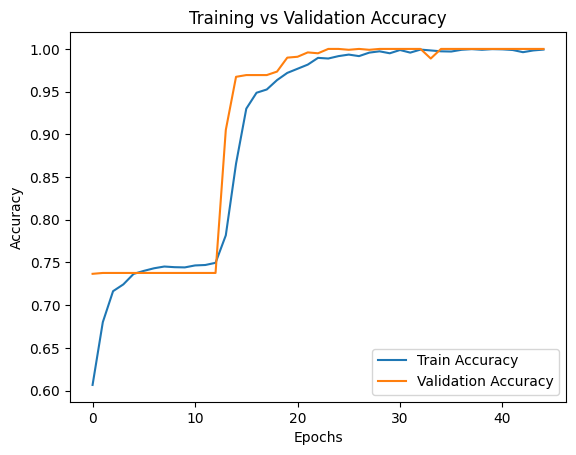

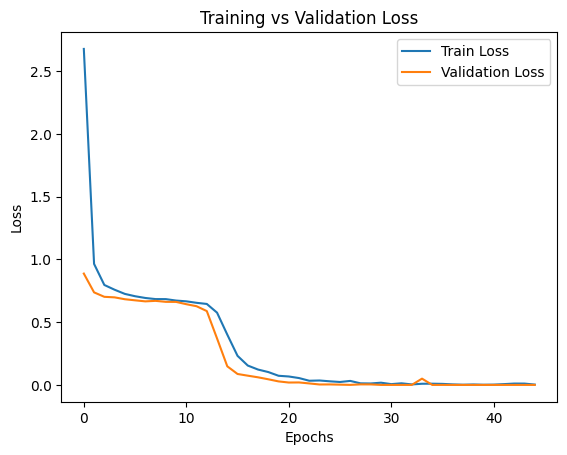

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()


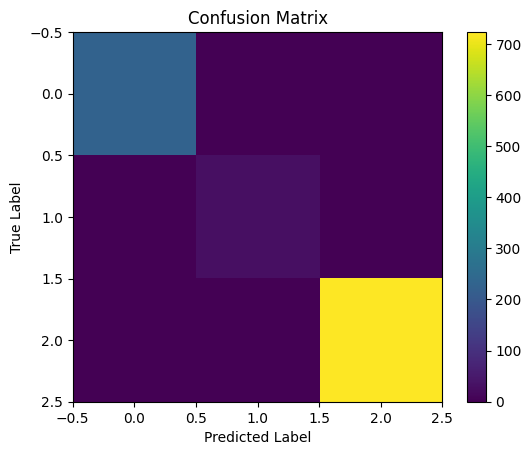

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00       723

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_true, y_pred))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy  = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall    = recall_score(y_true, y_pred, average='weighted')
f1        = f1_score(y_true, y_pred, average='weighted')

print(accuracy, precision, recall, f1)


1.0 1.0 1.0 1.0
